In [3]:
!pip install -U scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 6.7 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/10.6 MB 16.7 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 20.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.8/10.6 MB 22.1 MB/s eta 0:00:01
   ------------------ --------------------- 5.0/10.6 MB 22.7 MB/s eta 0:00:01
   ----------------------- ---------------- 6.2/10.6 MB 23.2 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 23.3 MB/s eta 0:00:01
   -------------------------------- ------- 8.6/10.6 MB 23.9 MB/s eta 0:00:01
   ------------------------------------ --- 9.6/10.6 MB 23.7 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 25.2 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 25.2 MB/s eta 

  You can safely remove it manually.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from api_tester import read_file
import seaborn as sns
%matplotlib inline

First we retrieve the data gathered from the Idealista API stored in a JSON file

In [5]:
filename = 'api_out.json'

arr = read_file(filename)['elementList']
nd = pd.DataFrame(arr)
nd.describe()
#nd.head(5)

,numPhotos,price,size,rooms,bathrooms,latitude,longitude,priceByArea
count,50.000000,5.000000e+01,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,23.680000,3.871058e+05,144.360000,2.52000,1.860000,38.733331,-9.161339,3218.040000
std,13.497453,2.286438e+05,100.745134,0.99468,1.069236,0.136740,0.186975,1886.518032
min,3.000000,6.900000e+04,36.000000,0.00000,0.000000,38.298546,-9.399459,363.000000
25%,15.000000,1.960000e+05,79.750000,2.00000,1.000000,38.685410,-9.305358,2015.250000
50%,23.500000,3.350000e+05,120.000000,2.00000,2.000000,38.722360,-9.174059,2702.500000
75%,30.750000,5.712500e+05,152.500000,3.00000,2.000000,38.774237,-9.119367,4186.000000
max,67.000000,1.180000e+06,528.000000,6.00000,6.000000,39.183583,-8.474335,9077.000000


In [6]:
nd.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,propertyType,operation,size,rooms,...,hasPlan,has3DTour,has360,hasStaging,topNewDevelopment,topPlus,district,parkingSpace,highlight,labels
0,33234769,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,00280224,20,bj,199000.0,flat,sale,89.0,2,...,False,False,False,False,False,False,NaN,NaN,NaN,NaN
1,33234787,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,095/2024AL,28,NaN,695000.0,chalet,sale,151.0,3,...,True,False,False,False,False,False,Tires,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
2,33234785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,SF00623,6,3,265000.0,flat,sale,113.0,3,...,False,False,False,False,False,False,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN
3,33234800,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,123,24,NaN,280000.0,flat,sale,70.0,2,...,False,False,False,False,False,False,Algés,NaN,NaN,NaN
4,33234790,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,4132-APA-AB,30,3,1180000.0,flat,sale,130.0,3,...,False,False,False,False,False,False,Lapa,NaN,NaN,NaN


### Let's visualize the data we've just fetched to get a better idea of the geographical disposal of the real estate for this study

Text(0.5, 1.0, 'longitue x latitutde')

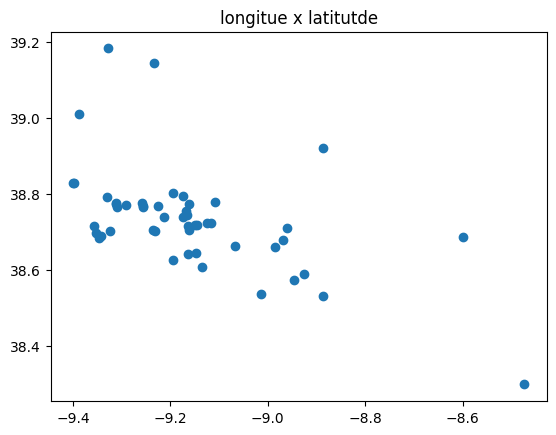

In [41]:
plt.scatter(nd.longitude, nd.latitude)
plt.title('longitue x latitutde')

Text(0.5, 1.0, 'Distribution of houses - Lisbon Metro Area')

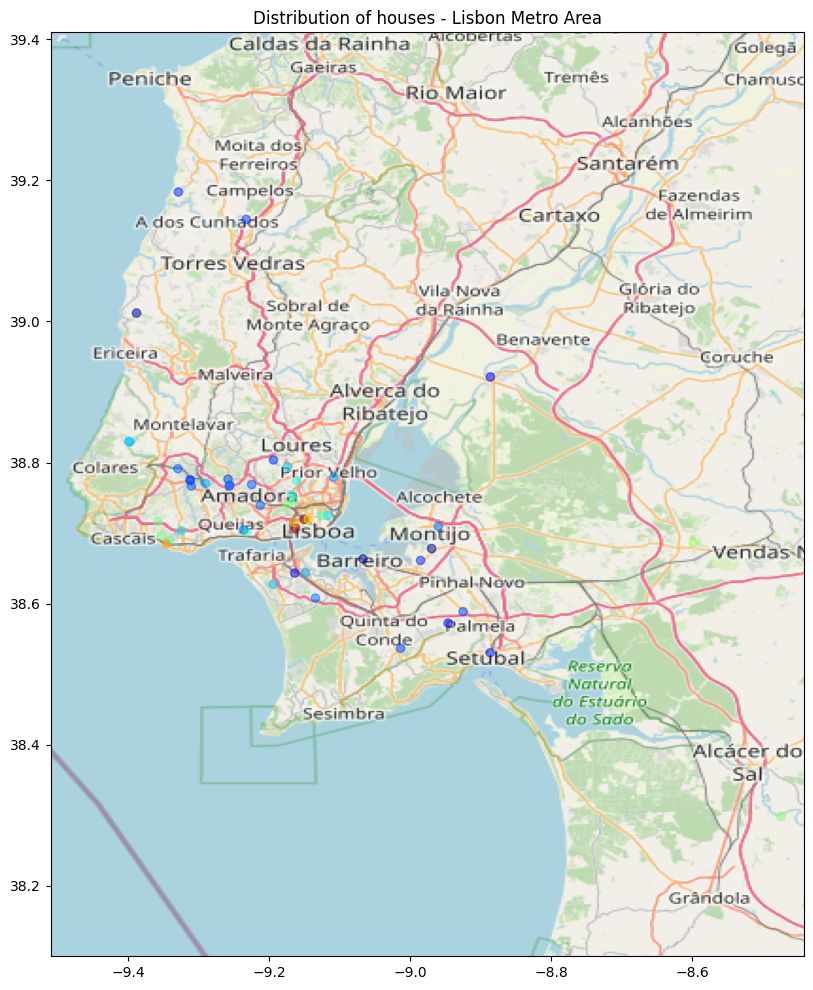

In [22]:
plt.figure(figsize=(12,12))
img = plt.imread('lisbon.png')
plt.imshow(img, zorder=0, extent=[-9.51, -8.442, 38.10, 39.41, ])

plt.scatter(x=nd.longitude, y=nd.latitude, alpha=0.5,
             c=nd['priceByArea'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')

plt.title('Distribution of houses - Lisbon Metro Area')

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

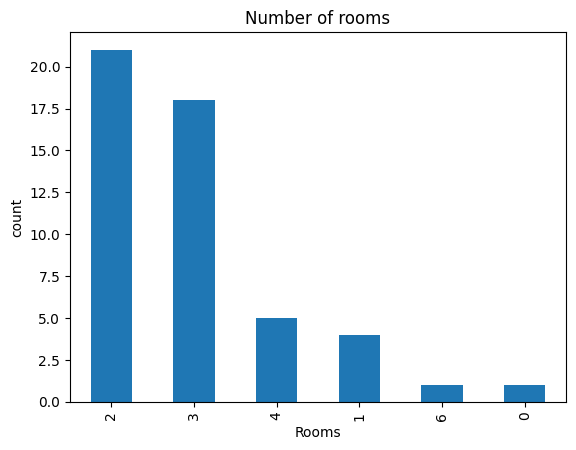

In [23]:
nd['rooms'].value_counts().plot(kind='bar')
plt.title('Number of rooms')
plt.xlabel('Rooms')
plt.ylabel('count')
sns.despine

In [24]:
nd = pd.get_dummies(data=nd, columns=['status','country','propertyType'])

<Figure size 1000x1000 with 0 Axes>

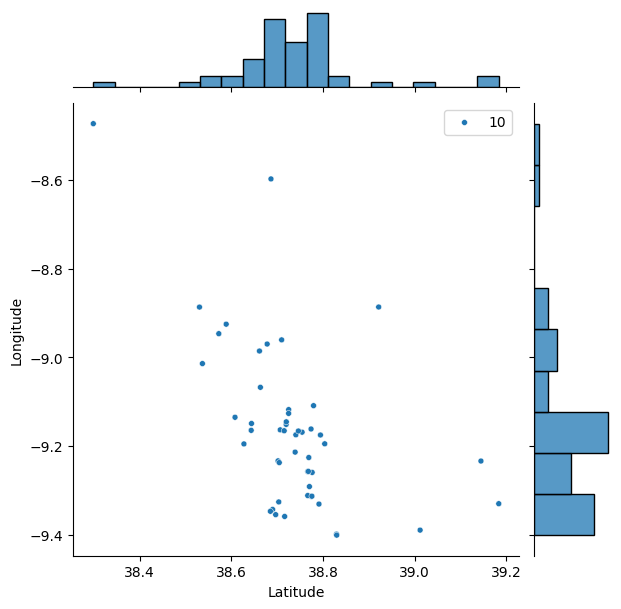

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [25]:
plt.figure(figsize=(10,10))
sns.jointplot(x=nd.latitude.values, y=nd.longitude.values, size=10)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Longitude', fontsize=10)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Size')

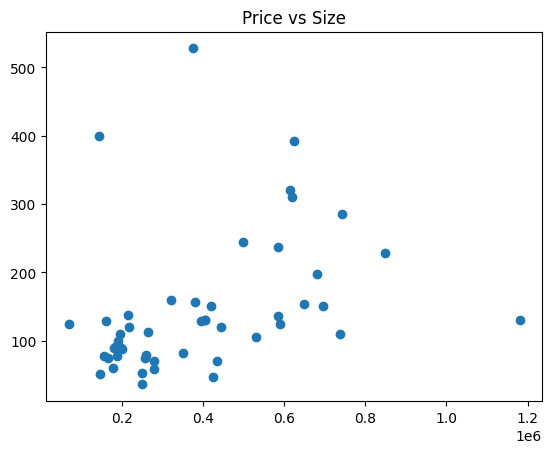

In [9]:
plt.scatter(nd.price,nd['size'])
plt.title('Price vs Size')

Text(0.5, 1.0, 'Price v Longitude')

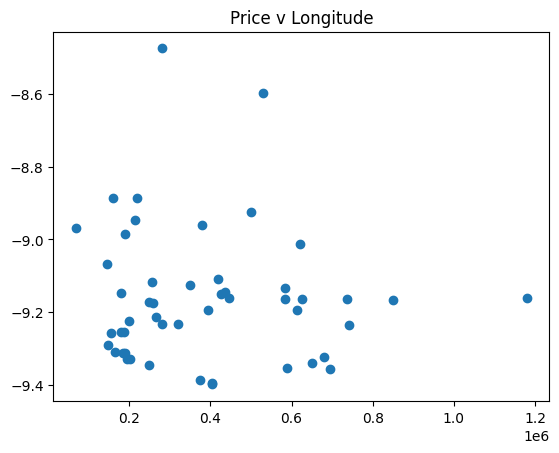

In [26]:
plt.scatter(nd['price'], nd.longitude)
plt.title('Price v Longitude')

Text(0.5, 1.0, 'Price v Latitude')

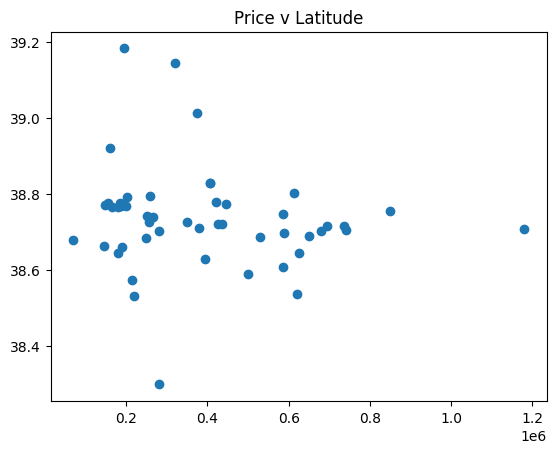

In [27]:
plt.scatter(nd.price, nd.latitude)
plt.title('Price v Latitude')

<AxesSubplot: >

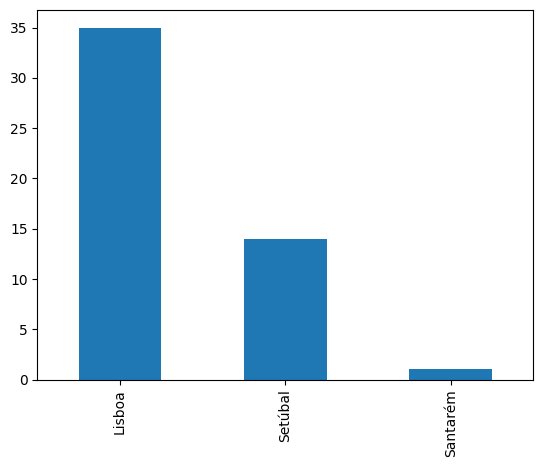

In [28]:
nd.province.value_counts().plot(kind='bar')


Text(0.5, 1.0, 'Price v Province')

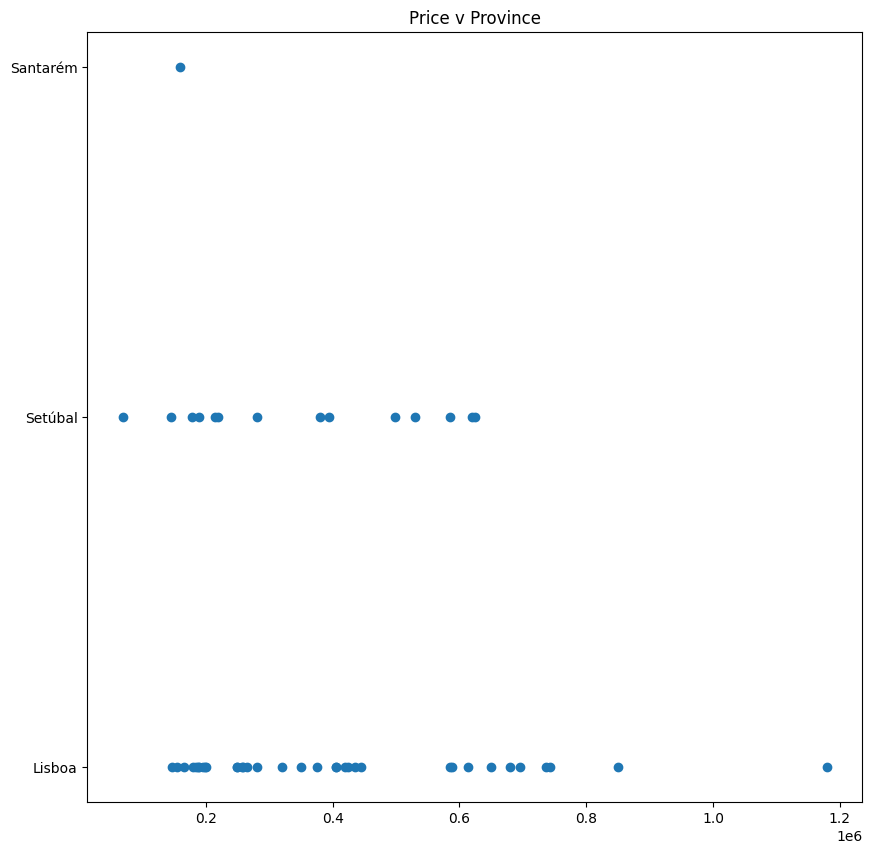

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.province)
plt.title('Price v Province')

Text(0.5, 1.0, 'Price v Municipality')

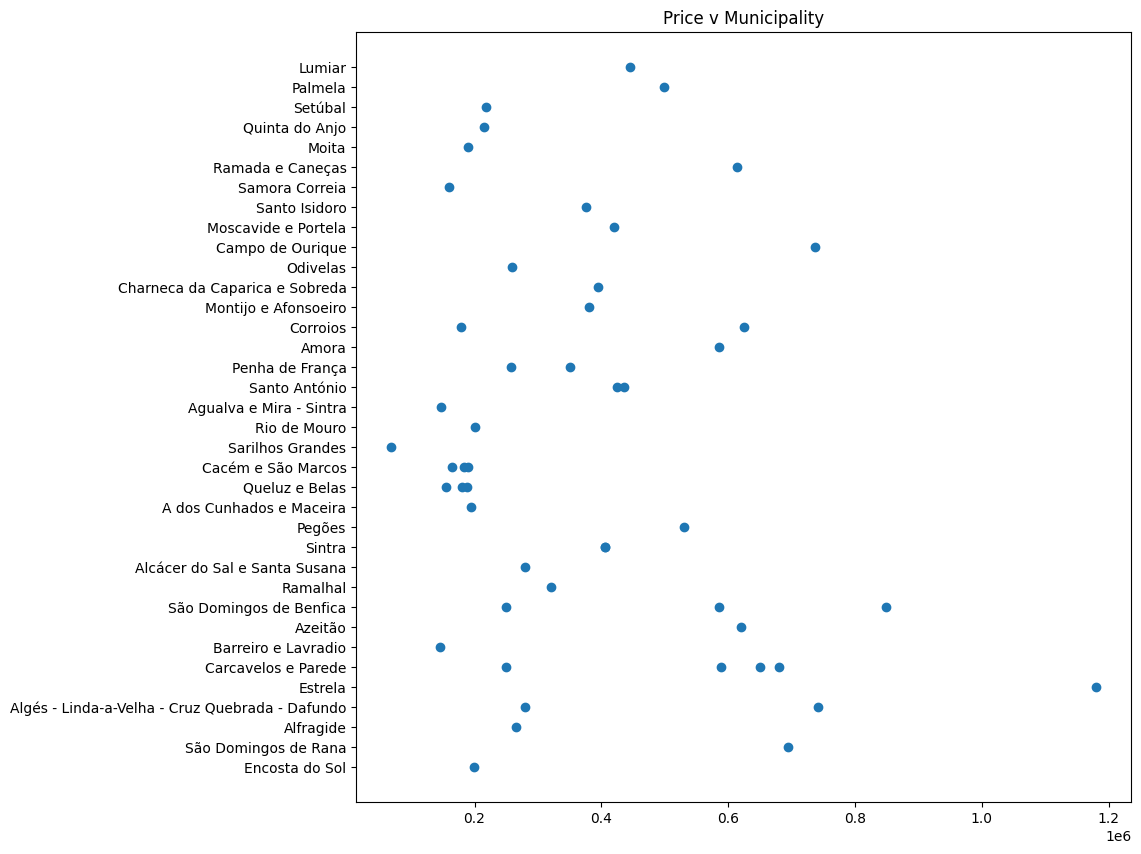

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.municipality)
plt.title('Price v Municipality')

Text(0.5, 1.0, 'Price v Bathrooms')

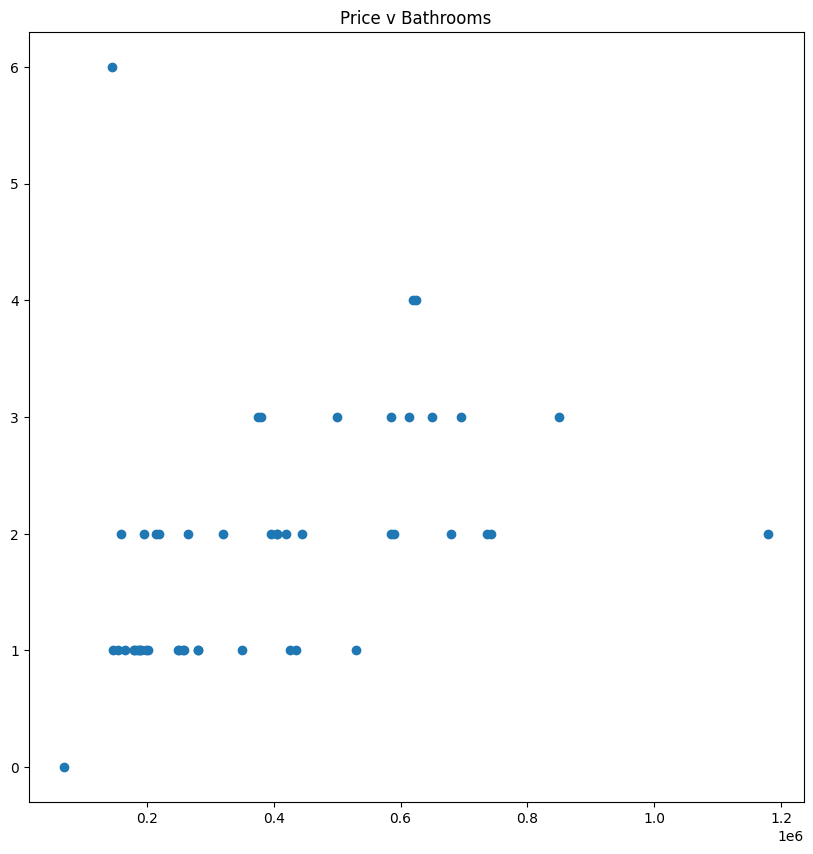

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(nd.price, nd.bathrooms)
plt.title('Price v Bathrooms')

In [32]:
nd = nd.replace({True:1,False:0})
nd.head()

,propertyCode,thumbnail,externalReference,numPhotos,floor,price,operation,size,rooms,bathrooms,...,district,parkingSpace,highlight,labels,status_good,status_renew,country_pt,propertyType_chalet,propertyType_flat,propertyType_studio
0,33234769,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,00280224,20,bj,199000.0,sale,89.0,2,1,...,NaN,NaN,NaN,NaN,1,0,1,0,1,0
1,33234787,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,095/2024AL,28,NaN,695000.0,sale,151.0,3,3,...,Tires,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,1,0,1,1,0,0
2,33234785,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,SF00623,6,3,265000.0,sale,113.0,3,2,...,NaN,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN,1,0,1,0,1,0
3,33234800,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,123,24,NaN,280000.0,sale,70.0,2,1,...,Algés,NaN,NaN,NaN,1,0,1,0,1,0
4,33234790,https://img3.idealista.pt/blur/WEB_LISTING/0/i...,4132-APA-AB,30,3,1180000.0,sale,130.0,3,2,...,Lapa,NaN,NaN,NaN,1,0,1,0,1,0


In [20]:
nd.columns

Index(['propertyCode', 'thumbnail', 'numPhotos', 'floor', 'price', 'operation',
       'size', 'rooms', 'bathrooms', 'address', 'province', 'municipality',
       'district', 'latitude', 'longitude', 'showAddress', 'url', 'distance',
       'description', 'hasVideo', 'newDevelopment', 'hasLift', 'parkingSpace',
       'priceByArea', 'detailedType', 'suggestedTexts', 'hasPlan', 'has3DTour',
       'has360', 'hasStaging', 'topNewDevelopment', 'topPlus',
       'externalReference', 'labels', 'highlight', 'status_good', 'country_pt',
       'propertyType_chalet', 'propertyType_flat'],
      dtype='object')

In [33]:
x_features = ['floor', 'size', 'rooms', 'bathrooms', 'province', 'newDevelopment', 'hasLift', 'status_good', 'propertyType_chalet', 'propertyType_flat']
x = nd[x_features]
y = nd['price']
#x = nd.drop(columns=['municipality','district','highlight','labels','hasPlan','priceByArea','operation','parkingSpace','propertyCode','suggestedTexts','detailedType','description','url','showAddress','hasVideo','latitude','longitude','externalReference', 'numPhotos','thumbnail', 'address', 'has3DTour', 'has360', 'hasStaging', 'topNewDevelopment', 'topPlus'])
x.head()

,floor,size,rooms,bathrooms,province,newDevelopment,hasLift,status_good,propertyType_chalet,propertyType_flat
0,bj,89.0,2,1,Lisboa,0,0.0,1,0,1
1,NaN,151.0,3,3,Lisboa,0,NaN,1,1,0
2,3,113.0,3,2,Lisboa,0,1.0,1,0,1
3,NaN,70.0,2,1,Lisboa,0,0.0,1,0,1
4,3,130.0,3,2,Lisboa,0,0.0,1,0,1


In [34]:
floor_values_to_replace = x.query("floor >= 'A' ")['floor']
selected_rows = x['floor'].isin(floor_values_to_replace)
x.loc[selected_rows, 'floor'] = 0

x.head()

,floor,size,rooms,bathrooms,province,newDevelopment,hasLift,status_good,propertyType_chalet,propertyType_flat
0,0,89.0,2,1,Lisboa,0,0.0,1,0,1
1,NaN,151.0,3,3,Lisboa,0,NaN,1,1,0
2,3,113.0,3,2,Lisboa,0,1.0,1,0,1
3,NaN,70.0,2,1,Lisboa,0,0.0,1,0,1
4,3,130.0,3,2,Lisboa,0,0.0,1,0,1


In [35]:
x.fillna(0, inplace=True)
x.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23568\2535237833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.fillna(0, inplace=True)


,floor,size,rooms,bathrooms,province,newDevelopment,hasLift,status_good,propertyType_chalet,propertyType_flat
0,0,89.0,2,1,Lisboa,0,0.0,1,0,1
1,0,151.0,3,3,Lisboa,0,0.0,1,1,0
2,3,113.0,3,2,Lisboa,0,1.0,1,0,1
3,0,70.0,2,1,Lisboa,0,0.0,1,0,1
4,3,130.0,3,2,Lisboa,0,0.0,1,0,1


Let's create two separate sets, one specific for Lisbon, and the other with all the other provinces we can find

In [37]:
x_lisbon = x.loc[x['province'] == 'Lisboa']
x_lisbon = x_lisbon.drop(columns=['province'])

x = pd.get_dummies(data=x, columns=['province'])

KeyError: 'province'

In [38]:
print('records from lisbon: ',x_lisbon.size)
print('records from everywhere else: ',x.size)

records from lisbon:  315
records from everywhere else:  600


### Set training data for our dataset

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

### For this implementation we're going to try different models in order to choose the one that make the better prediction

#### Linear Regression

In [53]:
linear = LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [54]:
predictions = linear.predict(x_test)
linear_mae = mean_absolute_error(predictions, y_test)
print('Mean absolute error: ',linear_mae)

Mean absolute error:  162514.30754621612


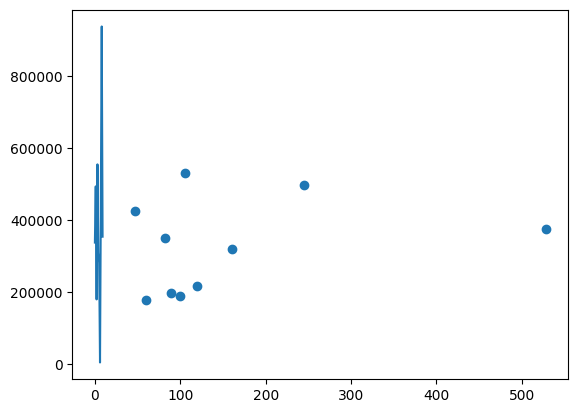

In [64]:
plt.plot(predictions)
plt.scatter(x_test['size'],y_test)
plt.show()

#### Decision Trees

In [97]:
#create a function to calculate the mean absolute error in the model 
def get_mae(leaf_nodes, x_train, x_test, y_train, y_test):
    dt_model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    dt_model.fit(x_train, y_train)
    pred = dt_model.predict(x_test)
    mae = mean_absolute_error(pred, y_test)
    #mse = mean_squared_error(pred, y_test)
    return mae

#create a function to calculate the mean squared error in the model 
def get_mse(leaf_nodes, x_train, x_test, y_train, y_test):
    dt_model = DecisionTreeRegressor(max_leaf_nodes=leaf_nodes, random_state=0)
    dt_model.fit(x_train, y_train)
    pred = dt_model.predict(x_test)
    #mae = mean_absolute_error(pred, y_test)
    mse = mean_squared_error(pred, y_test)
    return mse    

In [88]:
print('Mean absolute error: ',get_mae(100, x_train, x_test, y_train, y_test))
print('Mean squared error: ',get_mse(100, x_train, x_test, y_train, y_test))

Mean absolute error:  169900.0
Mean squared error:  55338250000.0


In [102]:
#this function will be used to detect the optimal number of leaf nodes for better performance in the decision tree model, by calculating the error for each combination
def get_best_decisiontree_model(x_train, x_test, y_train, y_test):
    prev_mae = max(y_test)
    best_leaf_size = 0
    for leaf_size in range(1, 5000, 10):
        print(leaf_size)
        print(get_mae(leaf_size, x_train, x_test, y_train, y_test))
        curr_mae = get_mae(leaf_size, x_train, x_test, y_train, y_test)
        print(curr_mae)
        if prev_mae < curr_mae:
            prev_mae = curr_mae
            best_leaf_size = leaf_size
        print('Node:',leaf_size,'\nMAE:',curr_mae)
    return DecisionTreeRegressor(max_leaf_nodes=best_leaf_size, random_state=0)

In [103]:
dt_model = get_best_decisiontree_model(x_train, x_test, y_train, y_test)
# dt_model.fit(x, y)
# pred = dt_model.predict(x_test)
# dt_mae = mean_absolute_error(pred,y_test)
# print('Final dt mean absolute error: ',dt_mae)

1
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\david\AppData\Local\Temp\ipykernel_23568\1833150343.py", line 1, in <module>
    dt_model = get_best_decisiontree_model(x_train, x_test, y_train, y_test)
  File "C:\Users\david\AppData\Local\Temp\ipykernel_23568\3540391916.py", line 7, in get_best_decisiontree_model
    print(get_mae(leaf_size, x_train, x_test, y_train, y_test))
  File "C:\Users\david\AppData\Local\Temp\ipykernel_23568\3900720419.py", line 4, in get_mae
    dt_model.fit(x_train, y_train)
  File "C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py", line 1145, in wrapper
  File "C:\Users\david\AppData\Local\Packag

#### Random Forest Regression

In [32]:
linear.score(x_test, y_test)

-0.9219003657223528

In [33]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators=100, max_depth=5, min_samples_split=2,
                                         learning_rate=0.1, loss='squared_error')

In [34]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [35]:
clf.score(x_test, y_test)

-0.30853316109384155